# Spotify 2019 - Top 50 songs 

### Libraries to import

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


### Importing the dataset from a csv file and cleaning it

In [2]:
filepath="top50.csv"
songs_data=pd.read_csv(filepath,encoding='latin',index_col=0)
songs_data.tail()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
46,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88
47,Te Robaré,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88
48,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88
49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


In [3]:
print(songs_data['Artist.Name'].count())

50


In [4]:
#renaming the column names
songs_data=songs_data.rename(columns = {"Track.Name":"Track_Name","Artist.Name":"Artist_Name","Beats.Per.Minute":"Beats_Per_Minute",
                                        "Loudness..dB..": "Loudness", 
                                        "Valence.":"Valence", 
                                        "Length.": "Length",
                                        "Acousticness..": "Acousticness",
                                        "Speechiness.":"Speechiness",
                                       })

In [5]:
songs_data.head()

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
#find null values
songs_data.isnull().sum()

Track_Name          0
Artist_Name         0
Genre               0
Beats_Per_Minute    0
Energy              0
Danceability        0
Loudness            0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [7]:
#convert length (seconds to minutes)
songs_data['Length'] =  round(songs_data['Length']/60,2)
songs_data['Length'].head()

1    3.18
2    5.03
3    3.10
4    3.30
5    2.92
Name: Length, dtype: float64

In [8]:
#Look up the genres
songs_data.groupby('Genre').size()

Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64

In [9]:
#group similar genres into one
songs_data['ParentGenre']=['hip hop' if "hip hop" in each
                            else 'electronic' if "edm" in each
                            else 'electronic' if "electropop" in each
                            else 'pop' if ("pop" in each or "boy band" in each)
                            else 'RandB' if "r&b" in each
                            else 'rap' if "rap" in each
                            else 'raggae' if "reggaeton" in each
                            else each for each in songs_data['Genre']]
songs_data['ParentGenre'].head()

1       pop
2    raggae
3       pop
4       pop
5       rap
Name: ParentGenre, dtype: object

In [49]:
songs_data.groupby('ParentGenre').size()

ParentGenre
RandB           1
big room        1
brostep         2
electronic      5
escape room     1
hip hop         4
latin           5
pop            22
raggae          4
rap             5
dtype: int64

In [10]:
songs_data.describe()

,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,3.348800,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,0.652338,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,1.920000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,2.942500,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,3.300000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,3.622500,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,5.150000,75.000000,46.000000,95.000000


In [11]:
songs_data.columns

Index(['Track_Name', 'Artist_Name', 'Genre', 'Beats_Per_Minute', 'Energy',
       'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length',
       'Acousticness', 'Speechiness', 'Popularity', 'ParentGenre'],
      dtype='object')

### Data Visualisation 

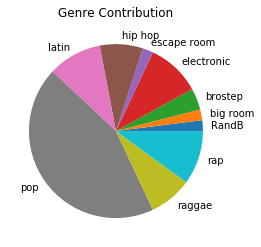

In [12]:
#Genre Contribution - Pie chart
from matplotlib.pyplot import axis
sums=songs_data.groupby('ParentGenre').size()
sums.plot.pie(label='',title='Genre Contribution')
plt.show(block=True)

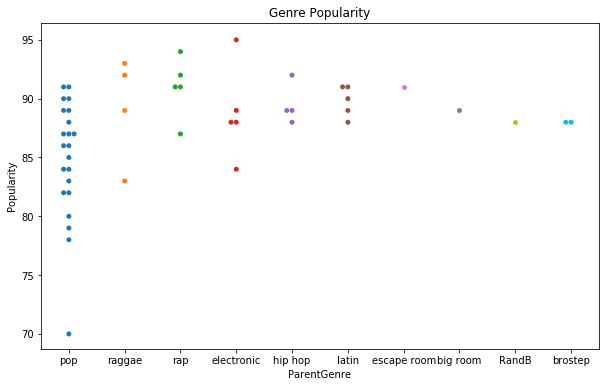

In [13]:
#Genre Popularity - swarm plot
plt.figure(figsize=(10,6))
plt.title("Genre Popularity")
sns.swarmplot(x=songs_data['ParentGenre'],y=songs_data['Popularity'])

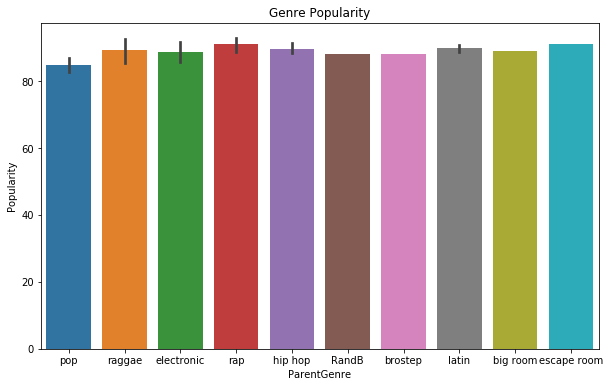

In [14]:
#Genre Popularity - Bar Chart
plt.figure(figsize=(10,6))
plt.title("Genre Popularity")
songs=songs_data.sort_values(['Popularity'])
sns.barplot(x=songs['ParentGenre'],y=songs['Popularity'])

Text(0, 0.5, 'Number of songs')

<Figure size 720x1440 with 0 Axes>

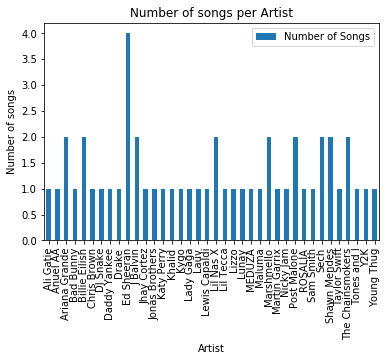

In [15]:
#Artists and contribution - Bar chart
nca=songs_data.groupby(["Artist_Name"]).count().iloc[:,:1]
nca.columns=['Number of Songs']
df = pd.DataFrame(nca)
plt.figure(figsize=(10,20))
df.plot.bar()
plt.title("Number of songs per Artist")
plt.xlabel("Artist")
plt.ylabel("Number of songs")

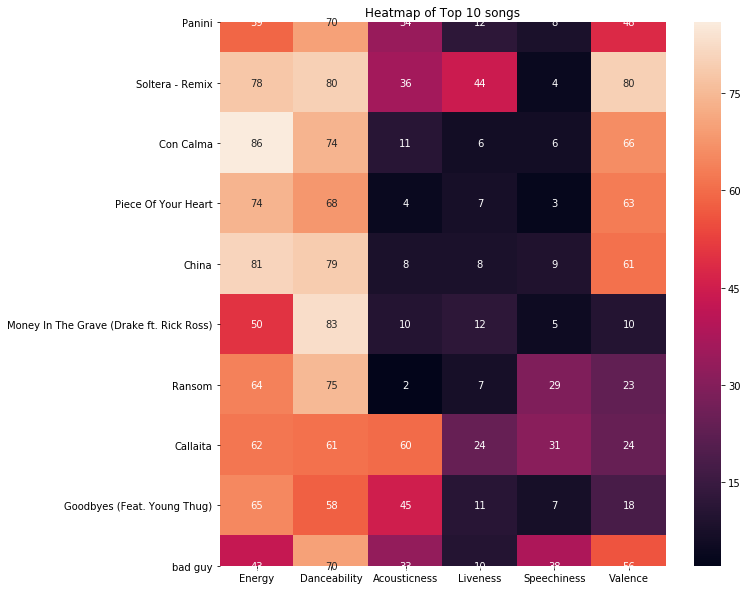

In [16]:
#Heatmap of Top 10 songs
top10=songs_data.sort_values(['Popularity'])
top10=top10.tail(10)
songs=top10[['Energy','Danceability','Acousticness','Liveness','Speechiness','Valence']]
#songs=top10.loc[:, 'Energy':'Speechiness':2]

#songs
plt.figure(figsize=(10,10))
plt.title('Heatmap of Top 10 songs')
plt.xlabel('Song Name')
sns.heatmap(data=songs,yticklabels=top10['Track_Name'],annot=True)

In [17]:
#Average function for genre
def AverageCount(Colname):
    Dict,Count,Genre_wise_mean={},{},{}
    df=songs_data[['ParentGenre',Colname]]
    for a,b in df.itertuples(index=False):
        if a not in Dict:
            Dict[a]=0
            Count[a]=0
        Dict[a]+=b
        Count[a]+=1
    
    for a in Dict.keys():
        Genre_wise_mean[a]=(Dict[a]/Count[a])
    
    return Genre_wise_mean
    

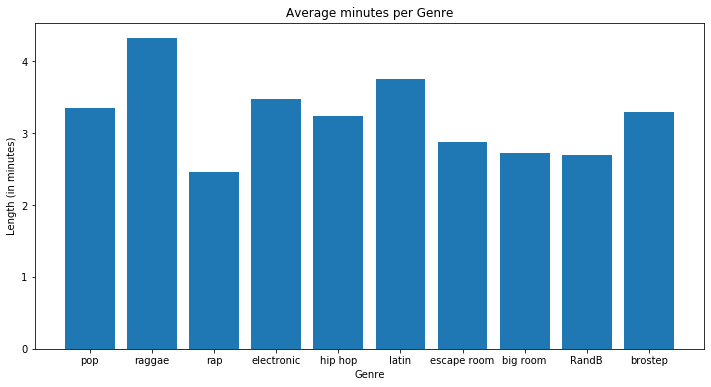

In [18]:
#Average minutes per Genre

meanDuration = AverageCount('Length')

plt.figure(figsize=(12,6))
plt.title('Average minutes per Genre')
plt.bar(range(len(meanDuration)), meanDuration.values(), align='center')
plt.xticks(range(len(meanDuration)),meanDuration.keys())
plt.xlabel('Genre')
plt.ylabel('Length (in minutes)')
plt.show()

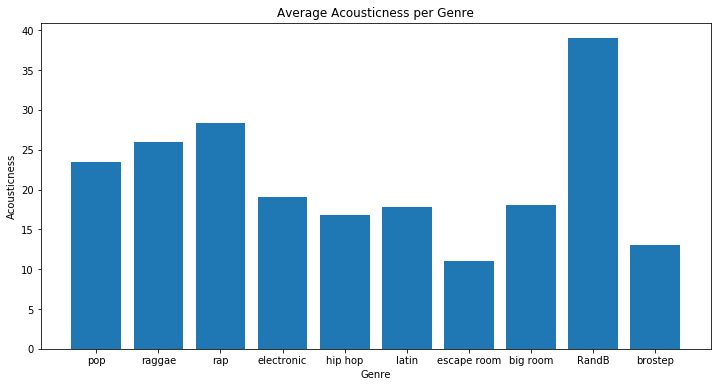

In [19]:
# Average acousticness per genre

meanAcousticness = AverageCount('Acousticness')

plt.figure(figsize=(12,6))
plt.title('Average Acousticness per Genre')
plt.bar(range(len(meanAcousticness)), meanAcousticness.values(), align='center')
plt.xticks(range(len(meanAcousticness)), meanAcousticness.keys())
plt.xlabel('Genre')
plt.ylabel('Acousticness')
plt.show()

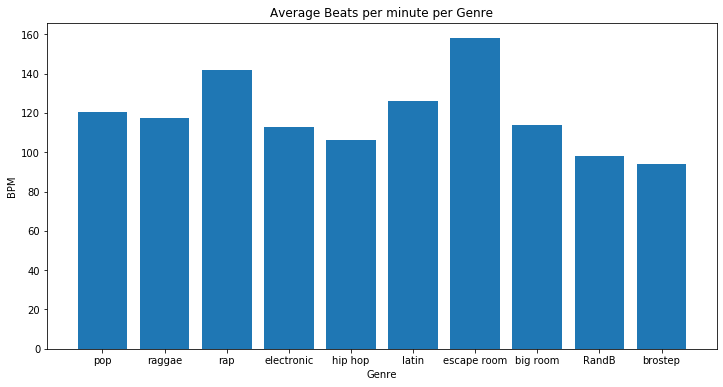

In [20]:
#Average beats per minute in songs - genre wise

meanBPM = AverageCount('Beats_Per_Minute')

plt.figure(figsize=(12,6))
plt.title('Average Beats per minute per Genre')
plt.bar(range(len(meanBPM)), meanBPM.values(), align='center')
plt.xticks(range(len(meanBPM)), meanBPM.keys())
plt.xlabel('Genre')
plt.ylabel('BPM')
plt.show()

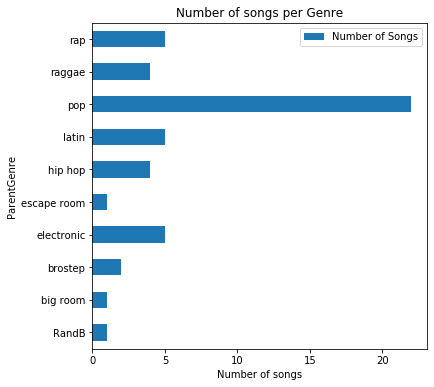

In [21]:
#Artists and Genre
noofsongs=songs_data.groupby(["ParentGenre"]).count().iloc[:,:1]
noofsongs.columns=['Number of Songs']
df = pd.DataFrame(noofsongs)
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.set_title("Number of songs per Genre")
plt.xlabel("Genre")
plt.xlabel("Number of songs")
df.plot.barh(stacked=False, ax=ax)


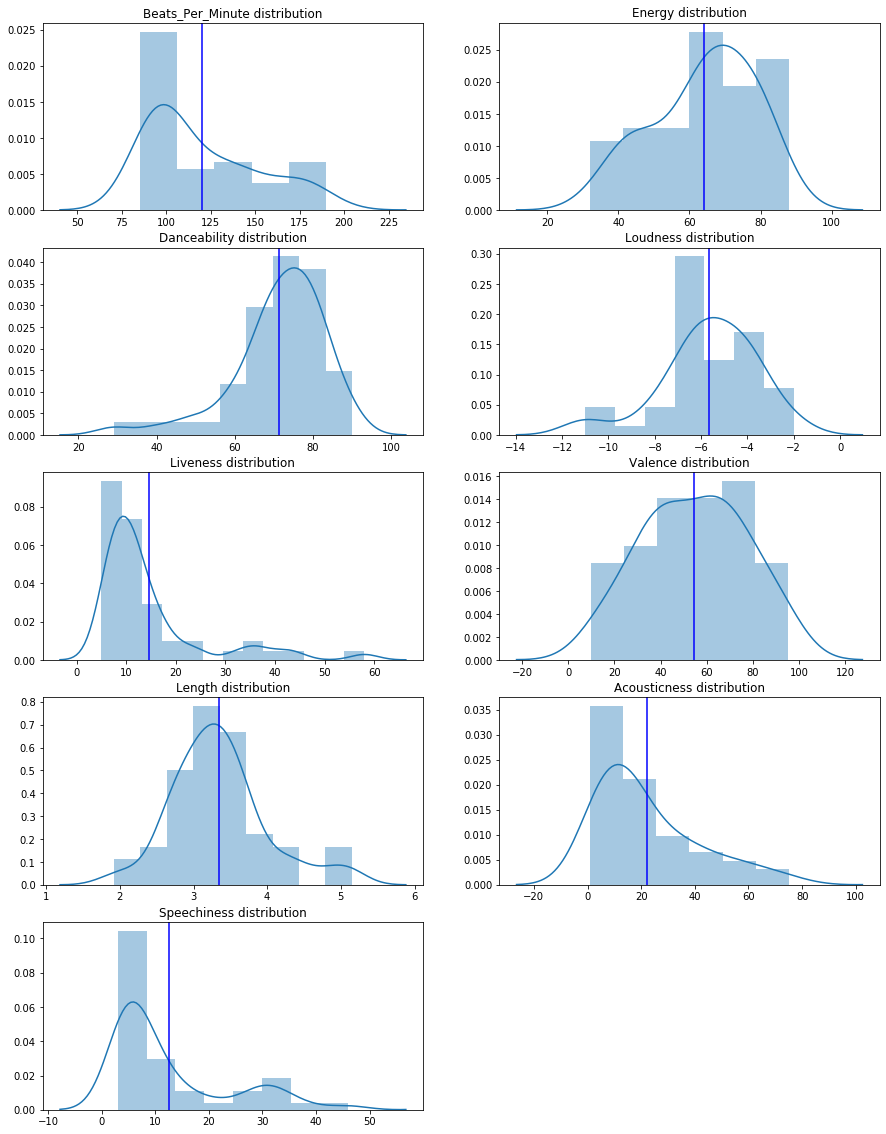

In [22]:
#Check for normally distributed data
#dist plots

numericaldata =  songs_data.iloc[:,3:12]  #selects numerical data from the data set - columns from Beats per minute to Speechiness

fig=plt.figure(figsize=(15,20))
for i,j in zip(numericaldata.columns,range(20)):
    ax=fig.add_subplot(5,2,j+1)
    sns.distplot(numericaldata[i],ax=ax,axlabel=False)
    plt.axvline(numericaldata[i].mean(),label='mean',color='blue')
    plt.title(i + " distribution")
plt.show()


In [23]:
skew=songs_data.skew()
print(skew)

Beats_Per_Minute    0.854504
Energy             -0.453199
Danceability       -1.379891
Loudness           -0.831915
Liveness            2.203937
Valence            -0.046490
Length              0.747271
Acousticness        1.135290
Speechiness         1.377581
Popularity         -1.503434
dtype: float64


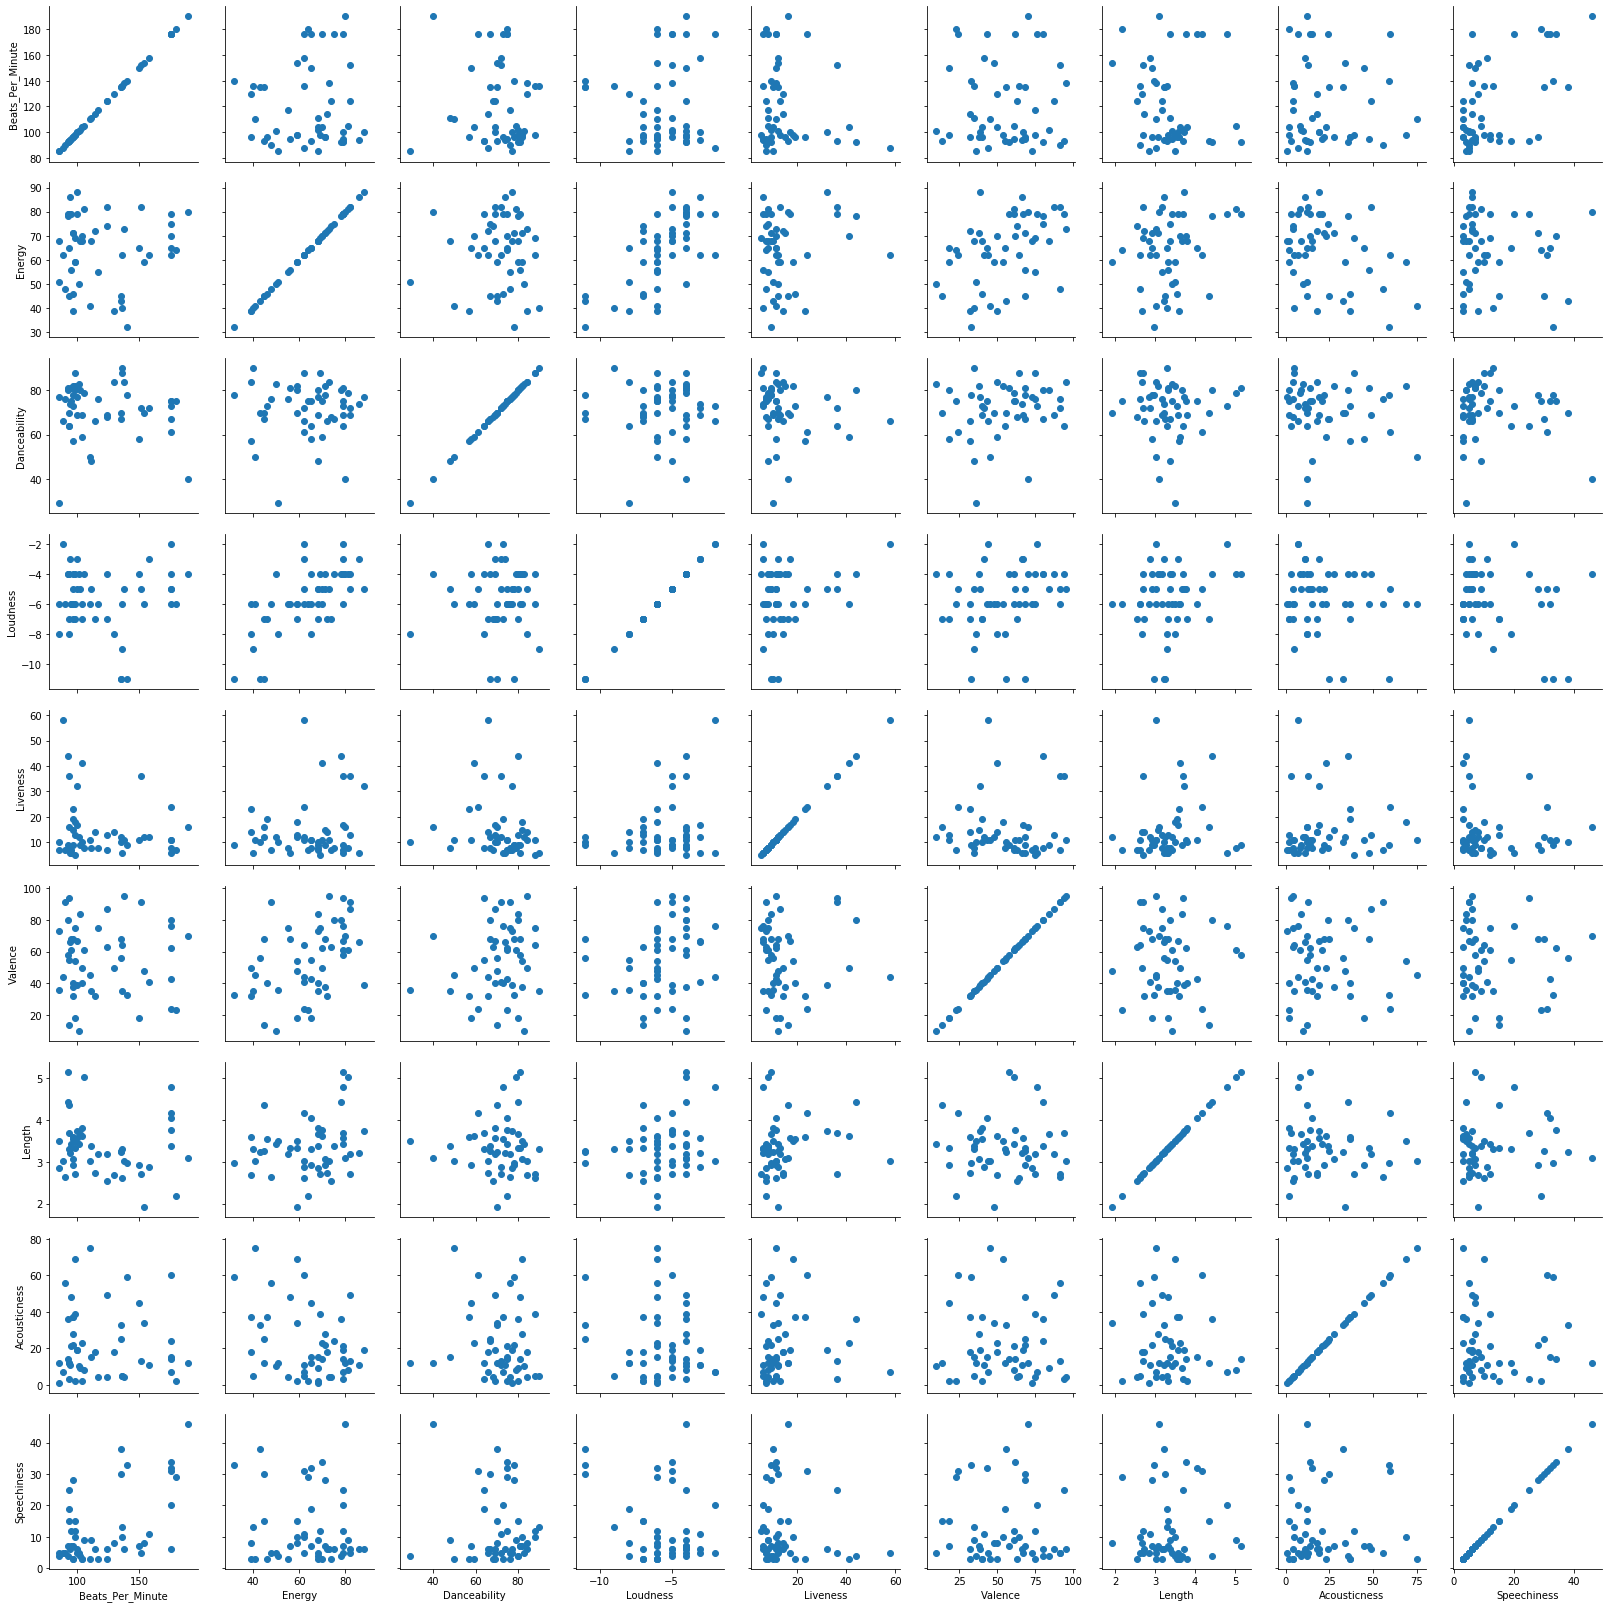

In [24]:
g = sns.PairGrid(numericaldata)
g = g.map(plt.scatter)

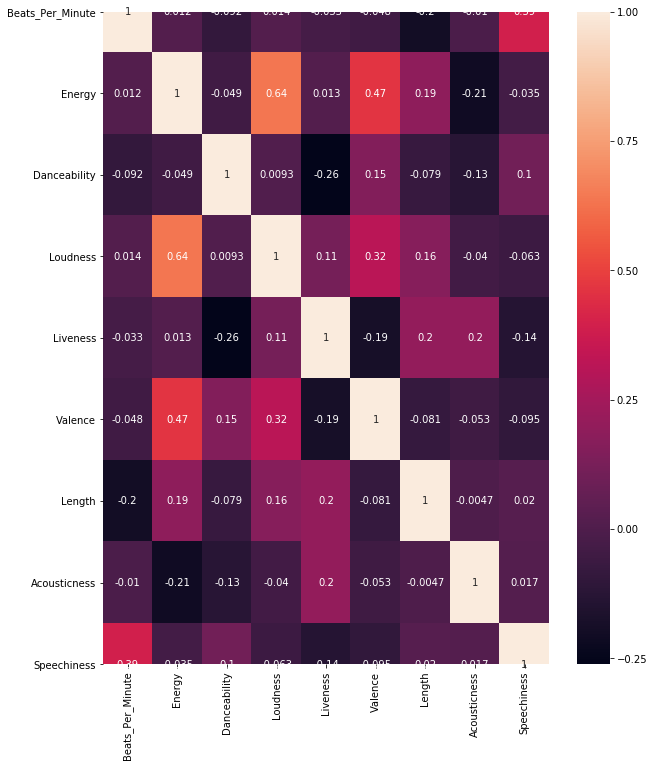

In [25]:
#checking for multi collinearity
plt.figure(figsize=(10,12))

sns.heatmap(numericaldata.corr(method='spearman'),annot=True)

#### Running Linear Regression 

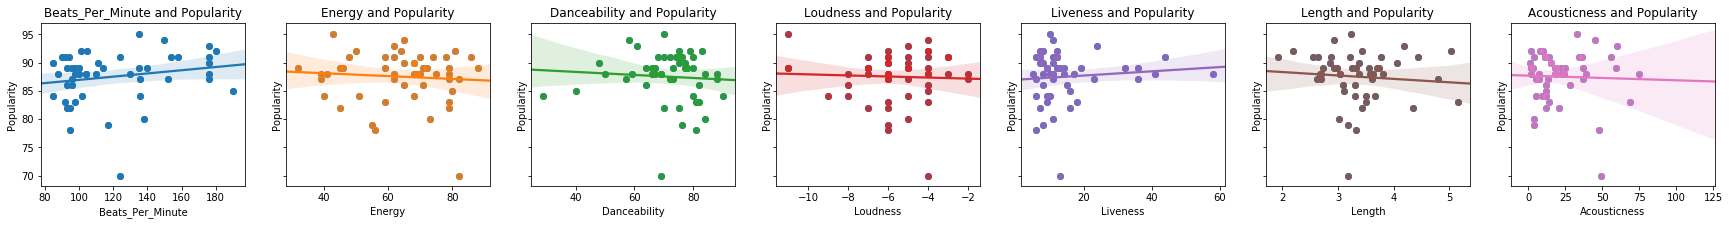

In [26]:
#linear Regression - Single

scatterplotdata = songs_data[['Beats_Per_Minute','Energy','Danceability','Loudness','Liveness','Length','Acousticness']]
#scatterplotdata = songs_data[['Valence','Speechiness']]
fig, axes = plt.subplots(1, 7, sharey=True, figsize =(30,3))
for i,j in zip(scatterplotdata.columns,range(20)):
    axes[j].scatter(scatterplotdata[i],songs_data['Popularity'])
    axes[j].set_title(str(i) +' and Popularity')
    sns.regplot(scatterplotdata[i],songs_data['Popularity'],ax=axes[j])
plt.show()

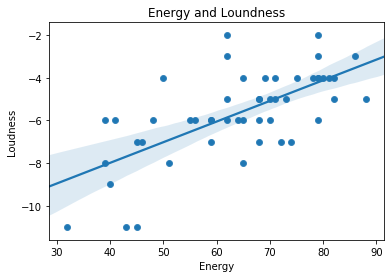

In [27]:
#Energy and Loudness
plt.title('Energy and Loundness')
sns.scatterplot(x=songs_data['Energy'],y=songs_data['Loudness'])
sns.regplot(x=songs_data['Energy'],y=songs_data['Loudness'])

In [28]:
#Linear Regression - Multiple

x = numericaldata.copy()
y = songs_data['Popularity']
x1 = sm.add_constant(x)
reg = sm.OLS(y,x1).fit()
reg.summary()

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.096
Date:                Thu, 06 Feb 2020   Prob (F-statistic):              0.387
Time:                        10:05:03   Log-Likelihood:                -140.04
No. Observations:                  50   AIC:                             300.1
Df Residuals:                      40   BIC:                             319.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               90.5198      9.579      9.450      0.000      71.161     109.879
Beats_Per_Minute     0.0096      0.027      0.358      0.722      -0.044       0.064
Energy               0.0149      0.072      0.208      0.836      -0.130       0.159
Danceability         0.0131      0.056      0.235      0.815      -0.100       0.126
Loudness             0.1304      0.464      0.281      0.780      -0.807       1.068
Liveness             0.0564      0.061      0.919      0.364      -0.068       0.180
Valence             -0.0708      0.033     -2.145      0.038      -0.138      -0.004
Length              -0.9665      1.057     -0.915      0.366      -3.102       1.169
Acousticness        -0.0092      0.037     -0.253      0.802      -0.083       0.065
Speechiness          0.0931      0.076      1.227      0.227      -0.060       0.247
==============================================================================
Omnibus:                       15.254   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.542
Skew:                          -1.028   Prob(JB):                     3.46e-05
Kurtosis:                       5.373   Cond. No.                     2.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Feature scaling

In [29]:
# feature scaling -- identify the worst performing features(input/independent) variable - and penalise by having a small weight
scaler = StandardScaler()
scaler.fit(x1)
scaled_x1 = scaler.transform(x1)

#### Feature selection

In [30]:
f_regression(scaled_x1,y)
p_values = f_regression(x,y)[1]
p_values.round(3)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


array([0.172, 0.579, 0.622, 0.766, 0.523, 0.025, 0.544, 0.811, 0.095])

#### Create summary table 

In [31]:
reg_summary = pd.DataFrame(data = numericaldata.columns.values, columns=['Features'])
reg_summary ['p-values'] = p_values.round(3)
reg_summary

,Features,p-values
0,Beats_Per_Minute,0.172
1,Energy,0.579
2,Danceability,0.622
3,Loudness,0.766
4,Liveness,0.523
5,Valence,0.025
6,Length,0.544
7,Acousticness,0.811
8,Speechiness,0.095


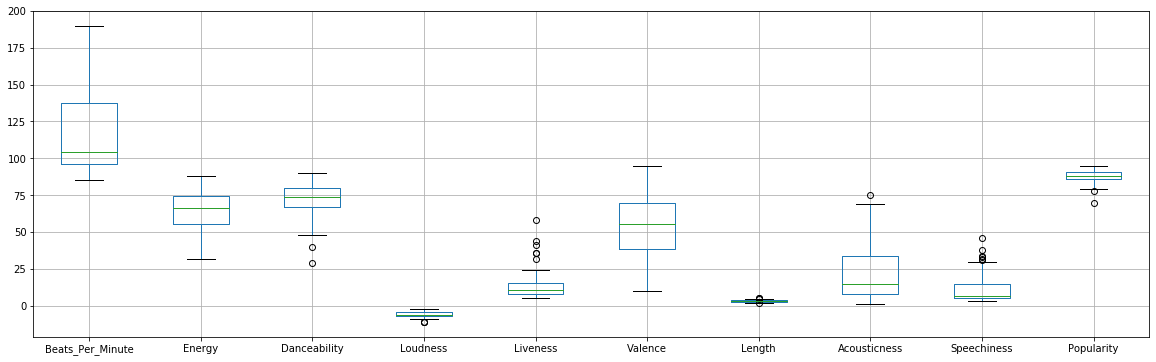

In [32]:
#box plot
boxplotdata = songs_data.copy()
plt.figure(figsize=(20,6))
boxplotdata.boxplot(return_type='axes');

In [33]:
#dealing with outliers
dummydata = songs_data.copy()
def find_outliers(dataframe):
    outliers = {}
    outlierslist = {}
    xd = pd.Series(dummydata[cols])
    iqr = xd.quantile(.75) - xd.quantile(.25)
    upper_bound = xd.quantile(.75)+1.5*iqr
    lower_bound = xd.quantile(.25)-1.5*iqr
    nooutliers = xd.between(lower_bound,upper_bound) # without outliers
    out = xd[~nooutliers]
    if not out.empty:
        for index in out.index:
                outlierslist[dummydata.loc[index,'Track_Name']]=str(out[index])
        outliers[cols]=outlierslist
    
    return outliers
print("Outliers")     
for cols in songs_data.drop(['Genre','Track_Name','Artist_Name','ParentGenre'],axis=1).columns:
 
    if not not find_outliers(cols):
        print(find_outliers(cols))
    
        

Outliers
{'Danceability': {'boyfriend (with Social House)': '40', 'Takeaway': '29'}}
{'Loudness': {'bad guy': '-11', 'bad guy (with Justin Bieber)': '-11', '7 rings': '-11'}}
{'Liveness': {'Soltera - Remix': '44', 'QUE PRETENDES': '36', 'Never Really Over': '32', 'Antisocial (with Travis Scott)': '36', 'One Thing Right': '58', 'Call You Mine': '41'}}
{'Length': {'China': '5.03', 'Otro Trago - Remix': '4.8', 'Panini': '1.92', 'No Me Conoce - Remix': '5.15'}}
{'Acousticness': {'Someone You Loved': '75'}}
{'Speechiness': {'boyfriend (with Social House)': '46', 'bad guy': '38', 'Callaita': '31', 'LA CANCIÓN': '32', '7 rings': '33', 'Otro Trago': '34'}}
{'Popularity': {"If I Can't Have You": '70', "fuck, i'm lonely (with Anne-Marie) - from \x9313 Reasons Why: Season 3\x94": '78'}}


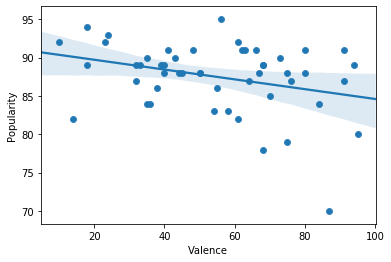

In [34]:
sns.scatterplot(x=songs_data['Valence'],y=songs_data['Popularity'])
sns.regplot(x=songs_data['Valence'],y=songs_data['Popularity'])

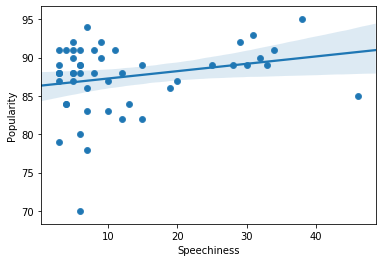

In [35]:
sns.scatterplot(x=songs_data['Speechiness'],y=songs_data['Popularity'])
sns.regplot(x=songs_data['Speechiness'],y=songs_data['Popularity'])

In [36]:
songs_data['ParentGenre'].unique()

array(['pop', 'raggae', 'rap', 'electronic', 'hip hop', 'latin',
       'escape room', 'big room', 'RandB', 'brostep'], dtype=object)

In [37]:
# Identifying Genre using parameters like 
# Beats_Per_Minute, Energy, Danceability, Loudness, Liveness, Valence, Length, Acousticness, Speechiness

targets = songs_data['ParentGenre']
dataset = numericaldata.values

genreDict = {'pop':0, 'raggae':1, 'rap':2, 'electronic':3, 'hip hop':4, 'latin':5,'escape room':6, 'big room':7, 'RandB':8, 'brostep':9}
targets = targets.map(genreDict)
targets = targets.values

In [38]:
# splitting dataset and targets into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset,targets,test_size=0.2,random_state=42)

In [39]:
# import tensorflow
import tensorflow as tf

In [47]:
def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [48]:
model = get_model()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(x_train, y_train, batch_size=32 , epochs=10,validation_split=0.2,callbacks=[callback])

Train on 32 samples, validate on 8 samples
Epoch 1/10
32/32 [==============================] - 1s 20ms/sample - loss: 20.8433 - accuracy: 0.0625 - val_loss: 12.9641 - val_accuracy: 0.1250
Epoch 2/10
32/32 [==============================] - 0s 823us/sample - loss: 16.3517 - accuracy: 0.0625 - val_loss: 8.4591 - val_accuracy: 0.0000e+00
Epoch 3/10
32/32 [==============================] - 0s 523us/sample - loss: 12.0935 - accuracy: 0.0625 - val_loss: 4.6195 - val_accuracy: 0.0000e+00
Epoch 4/10
32/32 [==============================] - 0s 610us/sample - loss: 8.8950 - accuracy: 0.1875 - val_loss: 3.1700 - val_accuracy: 0.3750
Epoch 5/10
32/32 [==============================] - 0s 501us/sample - loss: 7.9930 - accuracy: 0.3438 - val_loss: 2.8982 - val_accuracy: 0.6250
Epoch 6/10
32/32 [==============================] - 0s 702us/sample - loss: 7.3882 - accuracy: 0.4375 - val_loss: 2.4932 - val_accuracy: 0.6250
Epoch 7/10
32/32 [==============================] - 0s 750us/sample - loss: 6.2741

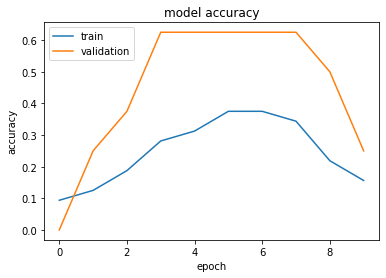

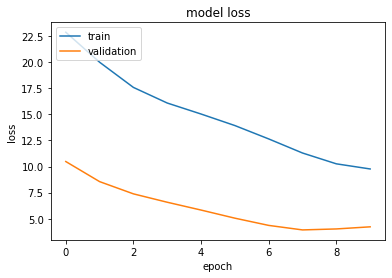

In [46]:
## plot the loss and the accuracy graph
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [43]:
dataset[:3]

array([[117.  ,  55.  ,  76.  ,  -6.  ,   8.  ,  75.  ,   3.18,   4.  ,
          3.  ],
       [105.  ,  81.  ,  79.  ,  -4.  ,   8.  ,  61.  ,   5.03,   8.  ,
          9.  ],
       [190.  ,  80.  ,  40.  ,  -4.  ,  16.  ,  70.  ,   3.1 ,  12.  ,
         46.  ]])